# Linear Regression (Practice)

Remember that Linear Regression is a supervised learning algorithm, meaning we'll have labeled data and try to predict new labels on unlabeled data. We'll explore some of the following concepts:
* Get our Data
* Exploratory Data Analysis (EDA)
* Clean our Data
* Review of Model Form
* Train and Test Groups
* Linear Regression Model

## Get our Data
We will use the Student Performance Data Set from CELT database at An-Najah National University use the supplied csv files in the notebook repository. We'll specifically look at the math class (CELT.csv). Make sure to take note that the delimiter is a semi-colon.

We would like to predict the final grade from students perfomance in G1 AND G2

In [1]:
# Read CSV, note the delimiter (sep)
df <- read.csv('student/CELT.csv')

In [4]:
df <-df[ , -1]

In [5]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
R,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,4,3,4,3,6,5,6,6
R,F,19,U,GT3,T,1,1,at_home,other,...,yes,yes,5,3,3,3,4,5,5,6
R,F,19,U,LE3,T,1,1,at_home,other,...,yes,yes,4,3,2,3,10,7,8,10
R,F,19,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,5,2,15,14,15
R,F,19,U,GT3,T,3,3,other,other,...,yes,no,4,3,2,5,4,6,10,10
R,M,19,U,LE3,T,4,3,services,other,...,yes,yes,5,4,2,5,10,15,15,15


In [6]:
summary(df)

 school   sex          age        address famsize   Pstatus      Medu      
 R :349   F:208   Min.   :18.00   R: 88   GT3:281   A: 41   Min.   :0.000  
 R1: 46   M:187   1st Qu.:19.00   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :19.00                             Median :3.000  
                  Mean   :18.81                             Mean   :2.749  
                  3rd Qu.:19.00                             3rd Qu.:4.000  
                  Max.   :22.00                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      traveltime   
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   Min.   :1.000  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   1st Qu.:1.000  
 Median :2.000   other   :141   other   :217   other     : 36   Median :1.000  
 Mean   :2.522   services:103   services:111   reputation:105   Mean   :1.448  
 3rd Qu.:3.000   teacher : 58   teacher : 29                    3rd 

## Clean the Data
Next we have to clean this data. This data is actually already cleaned for you, But here are some things you may want to consider doing for other data sets:
### Check for NA values
Let's see if we have any NA values:

In [7]:
any(is.na(df))

[1] FALSE

Great! Most real data sets will probably have NA or Null values, so its always good to check! Its up to you how to deal with them, either dropping them if they aren't too many, or imputing other values, like the mean value.

## Categorical Features
Moving on, let's make sure that categorical variables have a factor set to them. For example, the MJob column refers to categories of Job Types, not some numeric value from 1 to 5. R is actually really good at detecting these sort of values and will take of this work for you a lot of the time, but always keep in mind the use of factor() as a possible. Luckily this is basically already, we can check this using the str() function:

In [8]:
str(df)

'data.frame':	395 obs. of  29 variables:
 $ school    : Factor w/ 2 levels "R","R1": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 19 19 19 19 19 19 19 19 19 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ famsup    : Factor w/ 2 levels "

## Exploratory Data Analysis
Let's use ggplot2 to explore the data a bit. Feel free to expand on this section:

In [9]:
library(ggplot2)
library(ggthemes)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'ggthemes' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### Correlation and CorrPlots
From Wikipedia, correlation is defined as:
* In statistics, dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. Familiar examples of dependent phenomena include the correlation between the physical statures of parents and their offspring, and the correlation between the demand for a product and its price.

Correlation plots are a great way of exploring data and seeing if there are any interaction terms. Let's start off by just grabbing the numeric data (we can't see correlation for categorical data):

In [10]:
# Grab only numeric columns
num.cols <- sapply(df, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(df[,num.cols])

cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
age,1.000000000,0.007290627,-0.027293193,-0.108984299,-0.094090884,0.14571275,0.011506383,0.10679849,-0.049060257,0.008010967,-0.003118663,0.01200620,0.06253879,0.08118949
Medu,0.007290627,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,-0.046877829,0.100284818,0.20534100,0.21552717,0.21714750
Fedu,-0.027293193,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.014741537,0.024472887,0.19026994,0.16489339,0.15245694
traveltime,-0.108984299,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.007500606,-0.012943775,-0.09303999,-0.15319796,-0.11714205
studytime,-0.094090884,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.075615863,-0.062700175,0.16061192,0.13588000,0.09781969
failures,0.145712751,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.065827282,0.063725833,-0.35471761,-0.35589563,-0.36041494
famrel,0.011506383,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,0.094055728,-0.044354095,0.02216832,-0.01828135,0.05136343
freetime,0.106798492,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.075733357,-0.058077922,0.01261293,-0.01377714,0.01130724
goout,-0.049060257,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,-0.009577254,0.044302220,-0.14910397,-0.16225003,-0.13279147
health,0.008010967,-0.046877829,0.014741537,0.007500606,-0.075615863,0.06582728,0.094055728,0.07573336,-0.009577254,1.000000000,-0.029936711,-0.07317207,-0.09771987,-0.06133460


While this is fantastic information, it's hard to take it all in. Let's visualize all this data. There are lots of amazing 3rd party packages to do this, let's use and install the 'corrgram' package and the corrplot package. This will also install a bunch of dependencies for the package.

In [13]:
library(corrplot)
library(corrgram)

Warning message:
"package 'corrplot' was built under R version 3.3.3"Warning message:
"package 'corrgram' was built under R version 3.3.3"

Let's start by using corrplot, the most common one. [Here's a really nice documentation page on the package](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html). I encourage you to play around with it.

In [14]:
#help(corrplot)

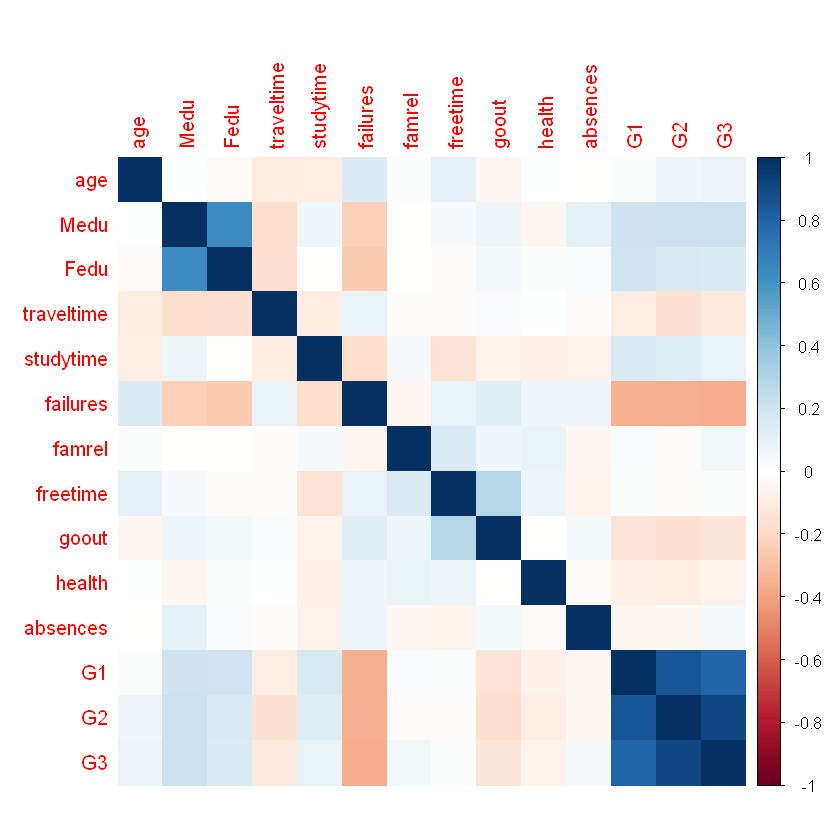

In [15]:
corrplot(cor.data,method='color')

Cleary we have very high correlation between G1, G2, and G3 which makes sense since those are grades:
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)
Meaning good students do well each period, and poor students do poorly each period, etc. Also a high G1,G2, or G3 value has a negative correlation with failure (number of past class failures).

Also Mother and Father education levels are correlated, which also makes sense.

We can also use the corrgram which allows to just automatically do these type of figures by just passing in the dataframe directly. There's a lot going on here, so reference the documentation of corrgram for more info.

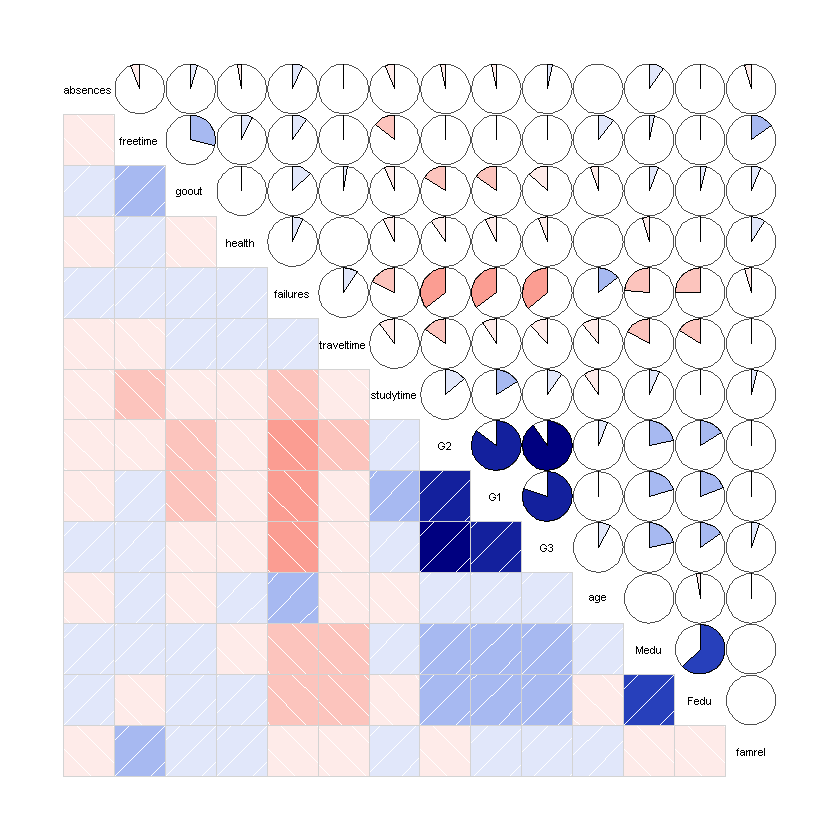

In [16]:
corrgram(df,order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt)

Since we're going to eventually try to predict the G3 score let's see a histogram of these scores

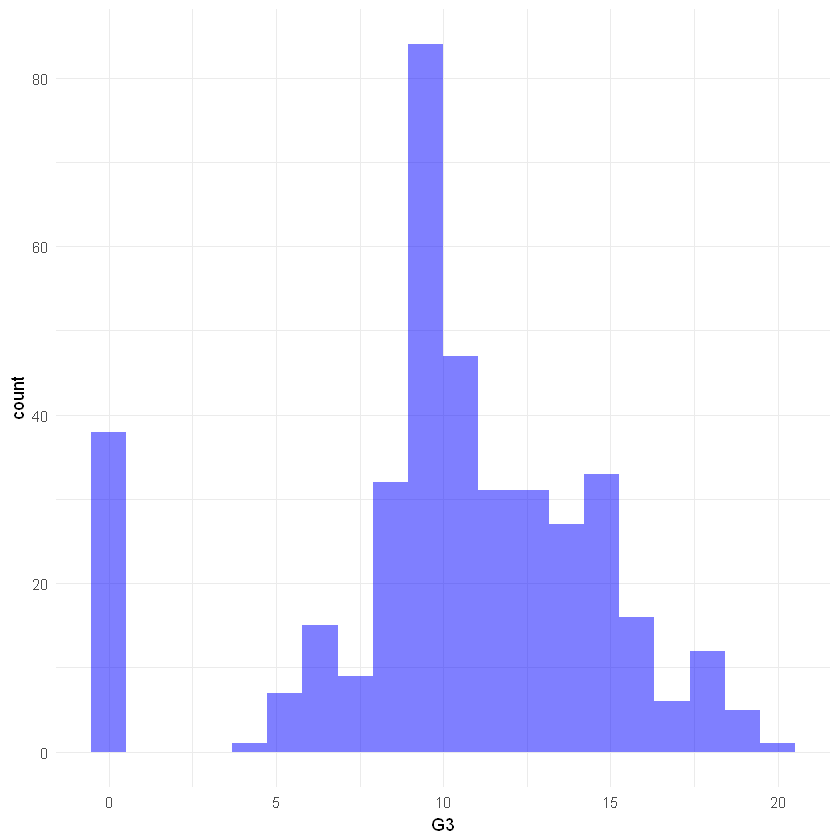

In [17]:
ggplot(df,aes(x=G3)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

Looks like quite a few students get a zero. This is a good place to ask questions, like are students missing the test? Also why is the mean occurence so high? Is this test curved?
Let's continue by building a model

## Building a Model¶
General Form:
The general model of building a linear regression model in R looks like this:

    model <- lm(y ~ x1 + x2,data)

    or to use all the features in your data

    model <- lm(y ~. , data) # Uses all features

### Train and Test Data
We'll need to split our data into a training set and a testing set in order to test our accuracy. We can do this easily using the caTools library:

In [59]:
splitdf <- function(dataframe, seed=NULL) {
    if (!is.null(seed)) set.seed(seed)
    index <- 1:nrow(dataframe)
    trainindex <- sample(index, trunc(length(index)/2))
    trainset <- dataframe[trainindex, ]
    testset <- dataframe[-trainindex, ]
    list(trainset=trainset,testset=testset)
}
splits <- splitdf(df, seed=101)
str(splits)
lapply(splits,nrow)
lapply(splits,head)
training <- splits$trainset
testing <- splits$testset


List of 2
 $ trainset:'data.frame':	197 obs. of  29 variables:
  ..$ school    : Factor w/ 2 levels "R","R1": 1 1 1 1 1 1 1 1 1 1 ...
  ..$ sex       : Factor w/ 2 levels "F","M": 1 1 1 2 1 2 2 2 2 1 ...
  ..$ age       : int [1:197] 19 19 18 19 19 19 19 19 19 19 ...
  ..$ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 1 2 2 ...
  ..$ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 1 2 1 1 2 1 2 1 ...
  ..$ Pstatus   : Factor w/ 2 levels "A","T": 2 2 2 1 2 2 2 2 2 2 ...
  ..$ Medu      : int [1:197] 1 3 4 4 2 3 2 4 4 3 ...
  ..$ Fedu      : int [1:197] 2 3 4 3 1 3 3 4 3 3 ...
  ..$ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 3 2 4 3 3 4 5 2 3 ...
  ..$ Fjob      : Factor w/ 5 levels "at_home","health",..: 3 3 2 1 3 4 4 5 3 3 ...
  ..$ reason    : Factor w/ 4 levels "course","home",..: 1 4 4 4 1 2 4 1 1 4 ...
  ..$ traveltime: int [1:197] 1 3 1 1 1 2 1 1 2 1 ...
  ..$ studytime : int [1:197] 2 2 2 2 2 1 2 1 2 4 ...
  ..$ failures  : int [1:197] 0 0 1 0 0 0 0 0 0 0 ...

$trainset
[1] 197

$testset
[1] 198

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
148,R,F,19,U,GT3,T,1,2,at_home,other,...,yes,yes,4,3,2,5,2,10,11,11
18,R,F,19,U,GT3,T,3,3,other,other,...,yes,no,5,3,2,4,4,8,10,10
279,R,F,18,U,GT3,T,4,4,health,health,...,yes,yes,2,4,4,4,15,9,8,8
258,R,M,19,U,LE3,A,4,3,services,at_home,...,yes,yes,4,3,1,1,12,11,11,11
98,R,F,19,U,GT3,T,2,1,other,other,...,yes,no,4,3,5,5,2,8,9,10
118,R,M,19,U,GT3,T,3,3,other,services,...,yes,yes,5,4,2,5,0,13,14,13
,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
1,R,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,4,3,4,3,6,5,6,6
3,R,F,19,U,LE3,T,1,1,at_home,other,...,yes,yes,4,3,2,3,10,7,8,10
5,R,F,19,U,GT3,T,3,3,other,other,...,yes,no,4,3,2,5,4,6,10,10


In [60]:
model <- lm(G3 ~ .,training)

In [61]:
summary(model)


Call:
lm(formula = G3 ~ ., data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6698 -0.6731  0.1042  0.9826  3.5997 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -13.466661   5.966688  -2.257 0.025363 *  
schoolR1          -0.341961   0.506753  -0.675 0.500771    
sexM               0.116787   0.313519   0.373 0.710010    
age                0.576458   0.302831   1.904 0.058762 .  
addressU           0.244048   0.376311   0.649 0.517574    
famsizeLE3        -0.214485   0.322948  -0.664 0.507553    
PstatusT          -0.390821   0.448704  -0.871 0.385059    
Medu               0.154735   0.232964   0.664 0.507518    
Fedu              -0.122297   0.184060  -0.664 0.507364    
Mjobhealth         0.519124   0.745296   0.697 0.487106    
Mjobother          0.403147   0.508690   0.793 0.429231    
Mjobservices       0.793150   0.564846   1.404 0.162201    
Mjobteacher        0.564414   0.705305   0.800 0.424757    
Fjobhe

In [62]:
# Grab residuals
res <- residuals(model)

# Convert to DataFrame for gglpot
res <- as.data.frame(res)

head(res)

,res
148,-0.08728234
18,-0.48971392
279,1.10457124
258,0.10423200
98,0.34771643
118,-0.14151007


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


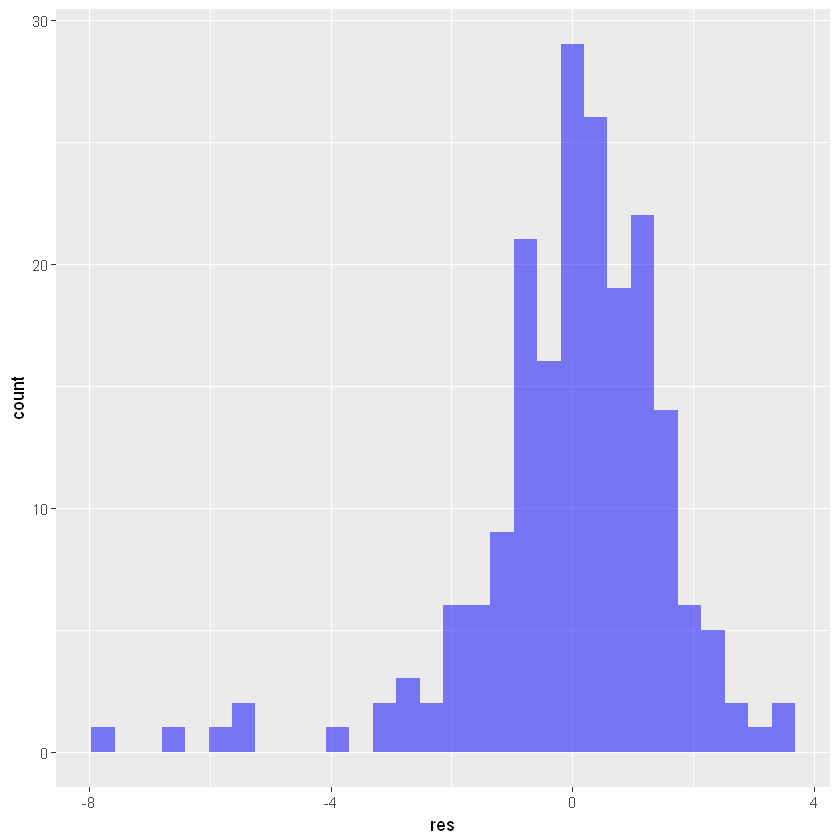

In [63]:
# Histogram of residuals
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

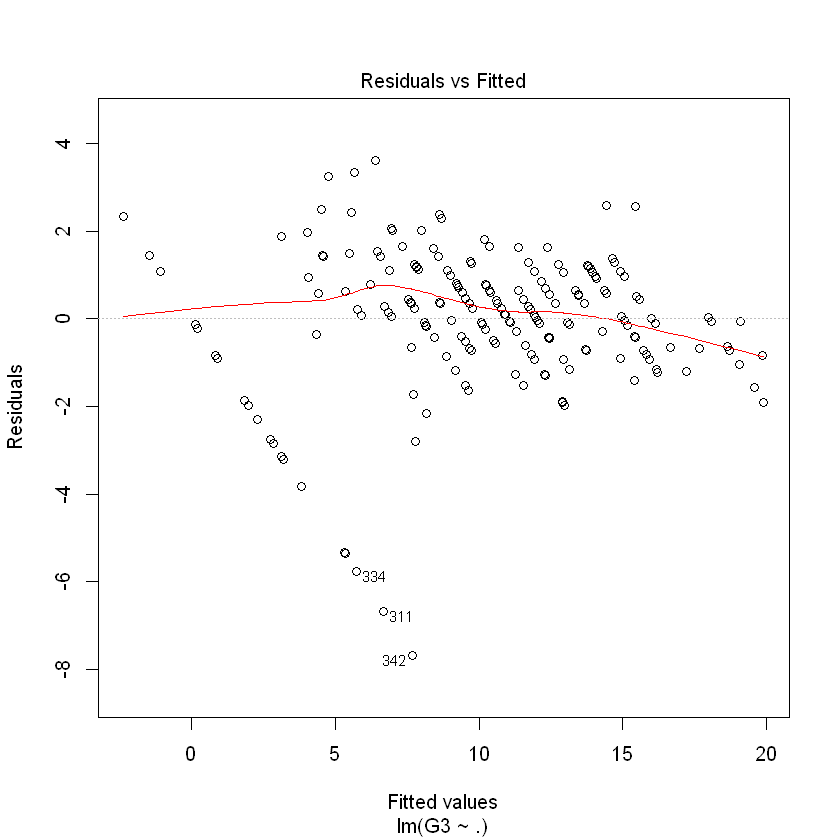

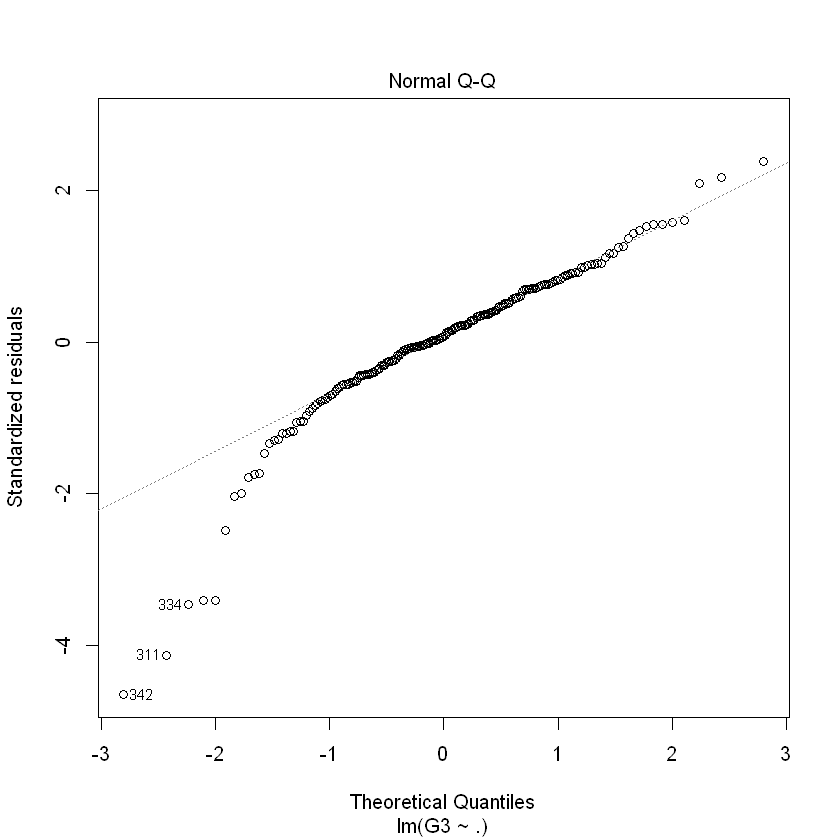

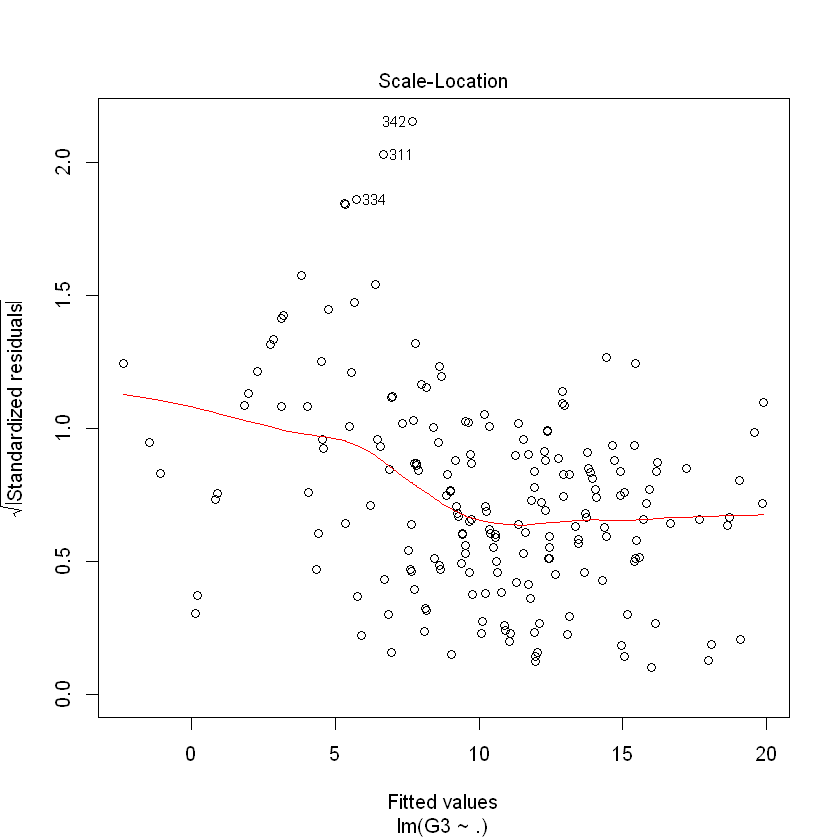

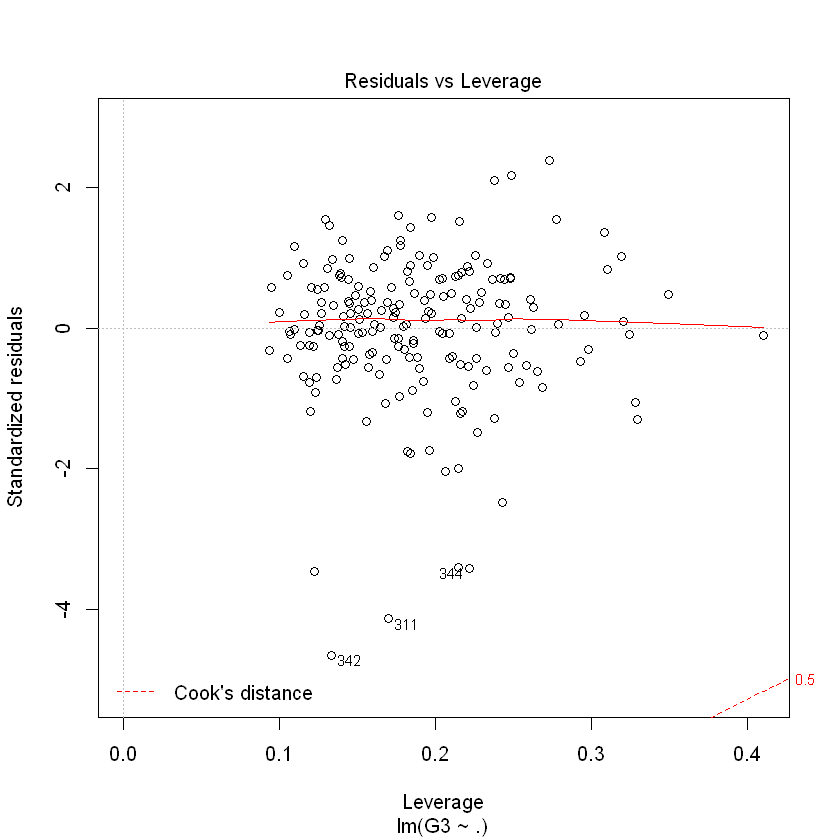

In [64]:
plot(model)

In [65]:
G3.predictions <- predict(model,testing)

In [66]:
results <- cbind(G3.predictions,testing$G3) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

In [67]:
to_zero <- function(x){
    if  (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [68]:
results$pred <- sapply(results$pred,to_zero)

In [69]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 5.094049


In [70]:
mse^0.5

[1] 2.257

In [71]:
SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$G3) - results$real)^2)

R2 = 1 - SSE/SST
R2

[1] 0.7429149